In [8]:
import librosa
import numpy as np
from matplotlib import pyplot as plt

In [11]:
!wget https://s3.amazonaws.com/ps.public.resources/ml-showcase/introduction-to-audio-analysis-and-processing/Datarock-FaFaFa.wav

--2021-07-29 20:51:18--  https://s3.amazonaws.com/ps.public.resources/ml-showcase/introduction-to-audio-analysis-and-processing/Datarock-FaFaFa.wav
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.12.46
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.12.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54114394 (52M) [audio/wav]
Saving to: ‘Datarock-FaFaFa.wav’

Datarock-FaFaFa.wav 100%[===================>]  51.61M  12.3MB/s    in 4.2s    

2021-07-29 20:51:22 (12.1 MB/s) - ‘Datarock-FaFaFa.wav’ saved [54114394/54114394]



In [12]:
x, sampling_rate = librosa.load('./Datarock-FaFaFa.wav', sr=44100)
print('Sampling Rate: ', sampling_rate)

Sampling Rate:  44100


In [13]:
x, sampling_rate = librosa.load('./Datarock-FaFaFa.wav', sr=None)
print('Sampling Rate: ', sampling_rate)

Sampling Rate:  44100


In [14]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [15]:
import IPython.display as ipd

example_name = 'nutcracker' 
audio_path = librosa.ex(example_name)
ipd.Audio(audio_path, rate=sampling_rate)

In [16]:
x, sampling_rate = librosa.load(audio_path, sr=None)
sampling_rate = librosa.get_samplerate(audio_path)
print('sampling rate: ', sampling_rate)
duration = librosa.get_duration(x)
print('duration: ', duration)

sampling rate:  22050
duration:  119.87591836734694


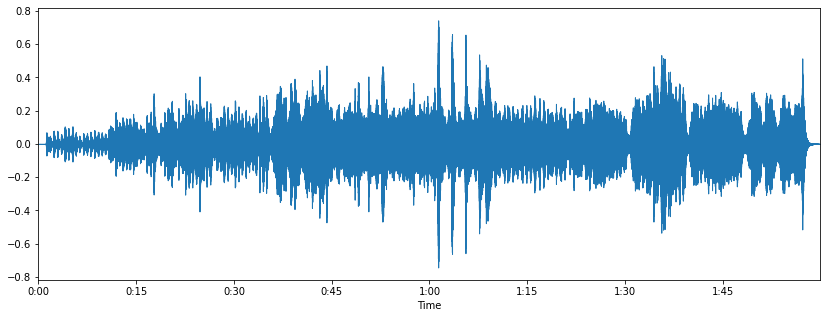

In [17]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sampling_rate)
plt.savefig('librosa-waveplot.png')

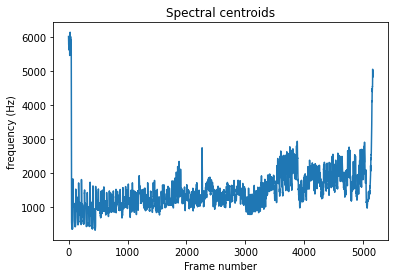

In [18]:
plt.plot(librosa.feature.spectral_centroid(x)[0])
plt.xlabel('Frame number')
plt.ylabel('frequency (Hz)')
plt.title('Spectral centroids')
plt.savefig('spectral-centroid.png')
plt.show()

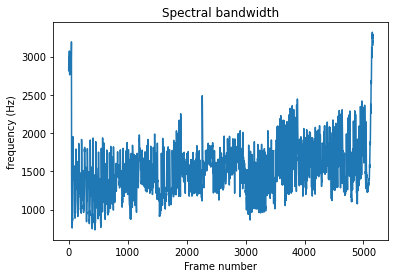

In [19]:
spec_bw = librosa.feature.spectral_bandwidth(x, sr=sampling_rate)
plt.plot(spec_bw[0])
plt.xlabel('Frame number')
plt.ylabel('frequency (Hz)')
plt.title('Spectral bandwidth')
plt.savefig('spectral-bw.png')
plt.show()

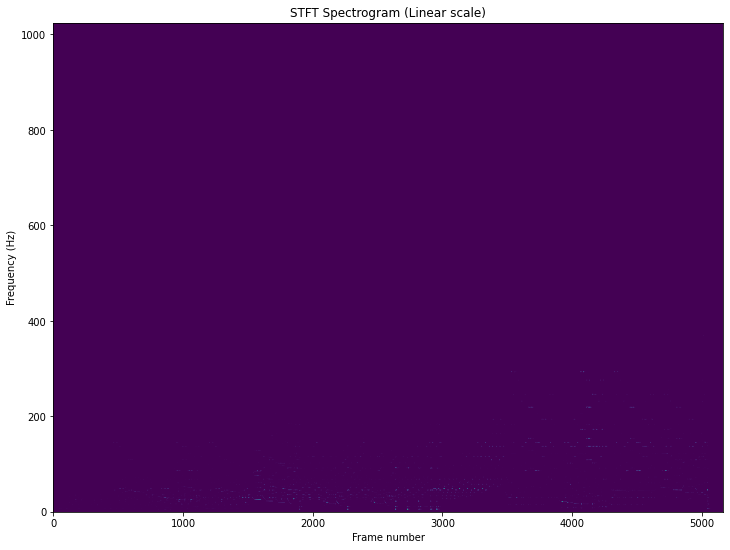

In [20]:
from matplotlib import pyplot as plt

S = librosa.stft(x)**2
fig = plt.figure(figsize=(12,9))
plt.title('STFT Spectrogram (Linear scale)')
plt.xlabel('Frame number')
plt.ylabel('Frequency (Hz)')
plt.pcolormesh(np.abs(S))
plt.savefig('stft-plt.png')

/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old na

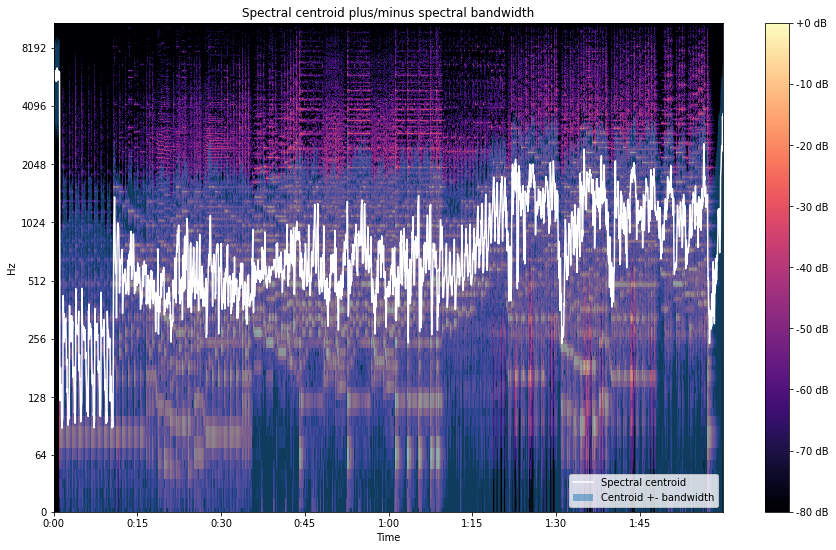

In [21]:
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=np.abs(S))
S_dB = librosa.amplitude_to_db(librosa.stft(x), ref=np.max)

fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='log', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Spectral centroid plus/minus spectral bandwidth')
ax.fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax.plot(times, centroid[0], label='Spectral centroid', color='w')
ax.legend(loc='lower right')
plt.savefig('centroid-vs-bw-librosa.png')

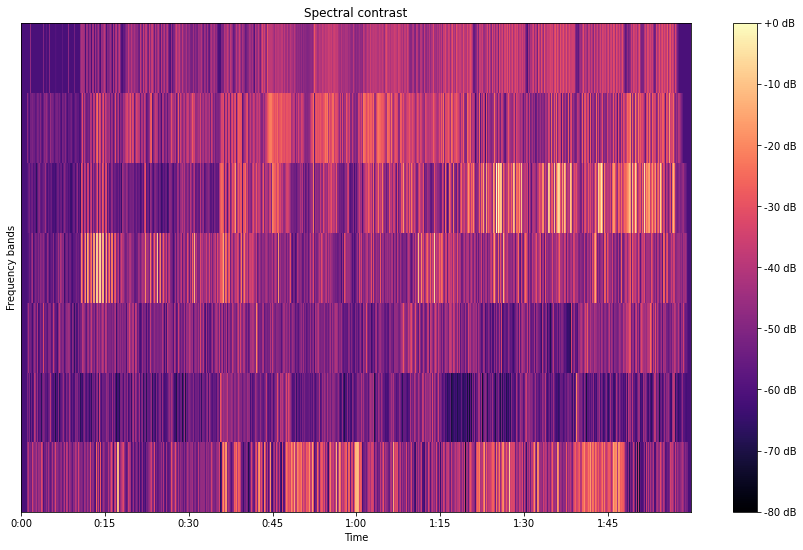

In [22]:
contrast = librosa.feature.spectral_contrast(S=np.abs(S), sr=sampling_rate)
fig, ax = plt.subplots(figsize=(15,9))
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(ylabel='Frequency bands', title='Spectral contrast')
plt.savefig('spectral-contrast-librosa.png')

/opt/conda/lib/python3.8/site-packages/librosa/display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


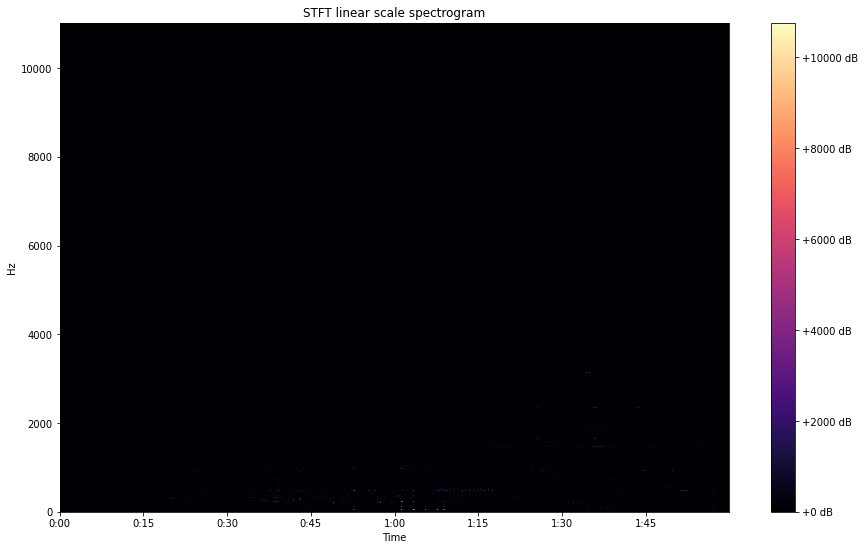

In [23]:
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(S, x_axis='time',
                         y_axis='linear', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='STFT linear scale spectrogram')
plt.savefig('stft-librosa-linear.png')

/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


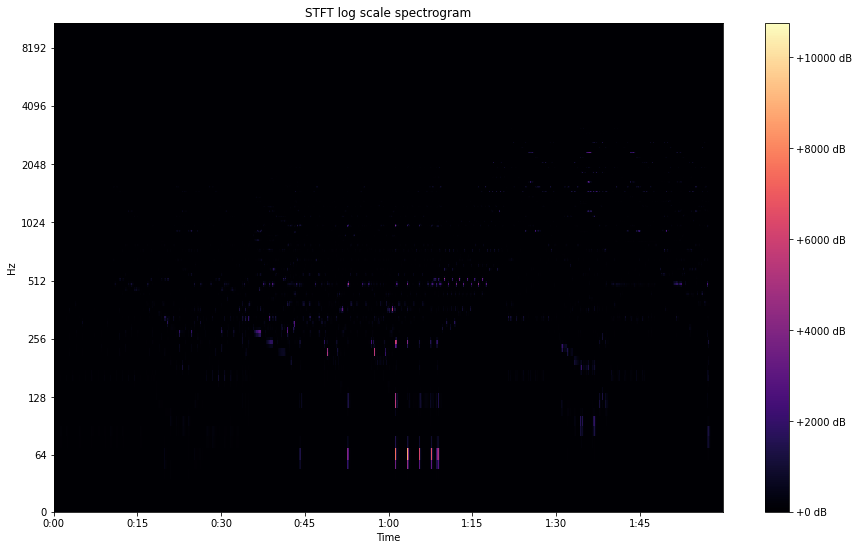

In [24]:
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(S, x_axis='time',
                         y_axis='log', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='STFT log scale spectrogram')
plt.savefig('stft-librosa-log.png')

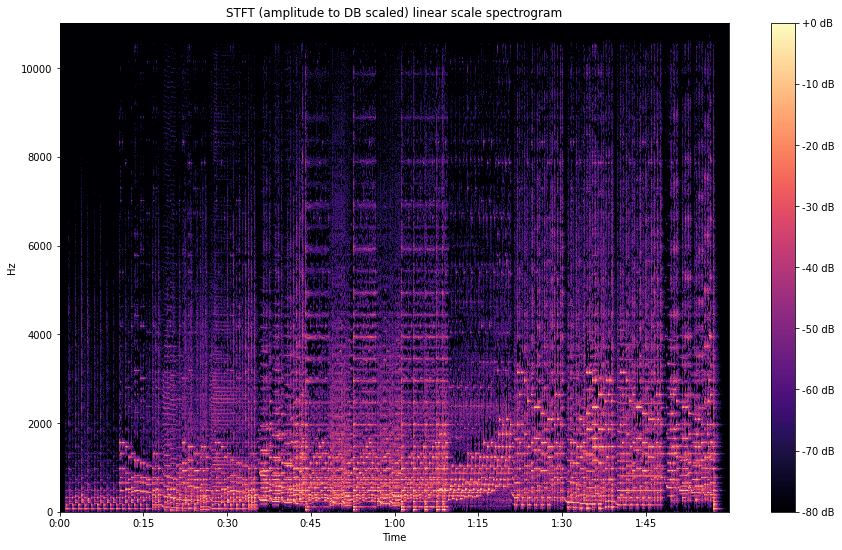

In [25]:
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='linear', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='STFT (amplitude to DB scaled) linear scale spectrogram')
plt.savefig('stft-librosa-linear-db.png')

/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


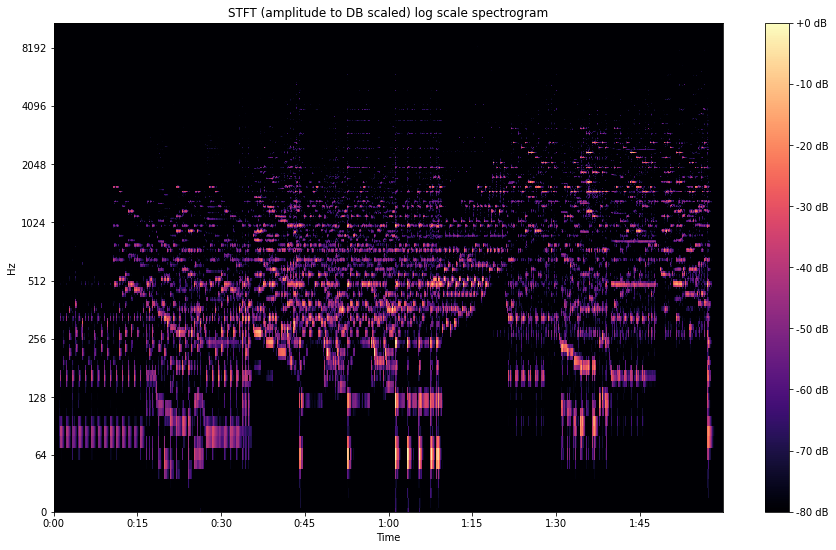

In [26]:
S_dB = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='log', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='STFT (amplitude to DB scaled) log scale spectrogram')
plt.savefig('stft-librosa-log-db.png')

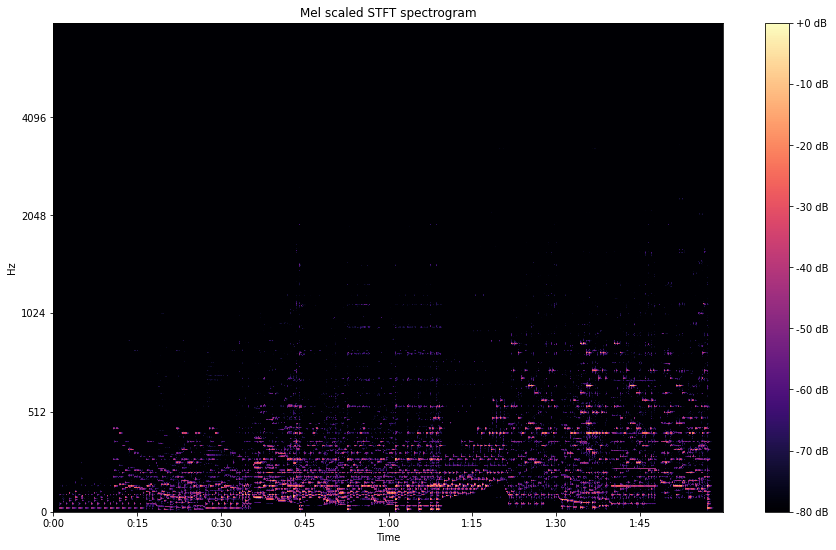

In [27]:
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel scaled STFT spectrogram')
plt.savefig('stft-librosa-mel.png')

/opt/conda/lib/python3.8/site-packages/librosa/core/spectrum.py:1544: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  warnings.warn(


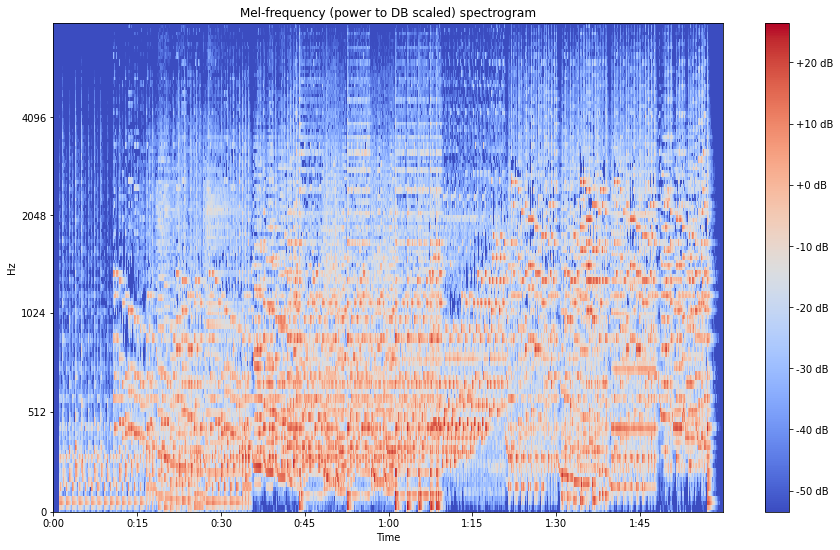

In [28]:
n_fft = 2048
mel_basis = librosa.filters.mel(sampling_rate, n_fft)
mel_spectrogram = librosa.core.power_to_db(mel_basis.dot(S))
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(mel_spectrogram, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency (power to DB scaled) spectrogram')
plt.savefig('mel-spec-librosa-db.png')

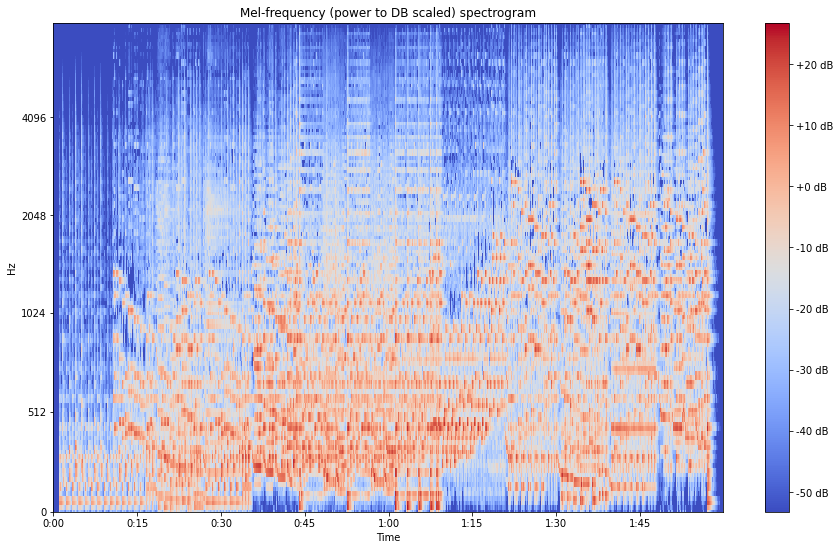

In [29]:
mel_spectrogram = librosa.power_to_db(librosa.feature.melspectrogram(x, sr=sampling_rate))
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(mel_spectrogram, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency (power to DB scaled) spectrogram')
plt.savefig('mel-spec-librosa-db.png')

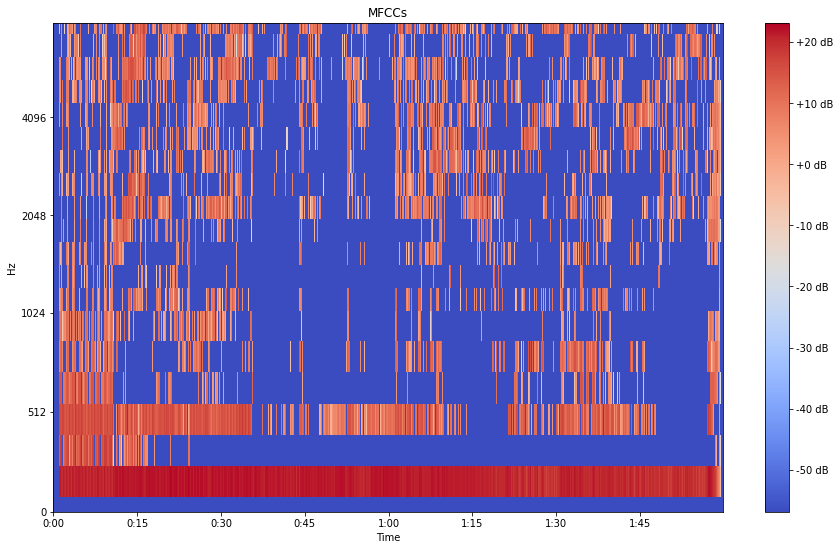

In [30]:
mfcc = librosa.core.power_to_db(librosa.feature.mfcc(x, sr=sampling_rate))
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(mfcc, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='MFCCs')
plt.savefig('mfcc-librosa-db.png')

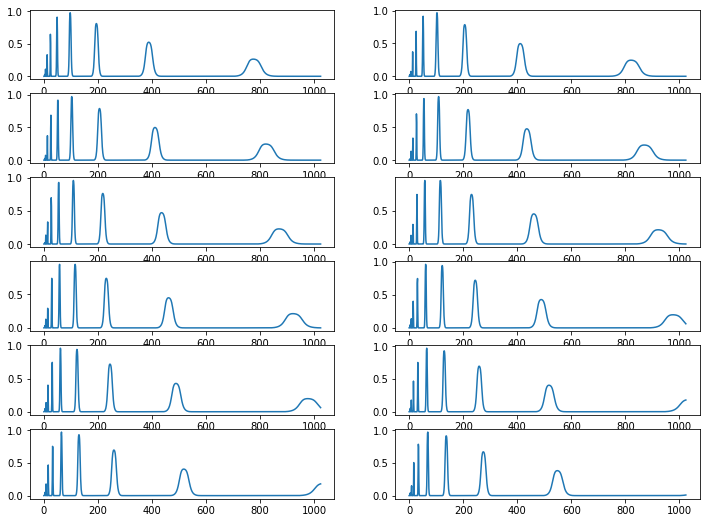

In [31]:
chroma_filters = librosa.filters.chroma(sampling_rate, 2048)
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,9))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        col.plot(chroma_filters[i + j])
        
plt.savefig('chroma-filters.png')
plt.show()

/opt/conda/lib/python3.8/site-packages/librosa/display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


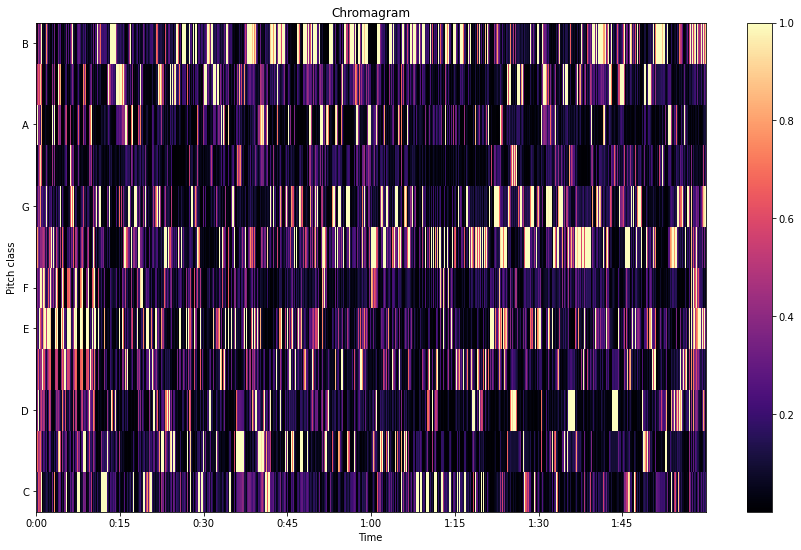

In [32]:
chroma = librosa.feature.chroma_stft(S=S, sr=sampling_rate)
fig, ax = plt.subplots(figsize=(15,9))
img = librosa.display.specshow(chroma, y_axis='chroma', 
                               x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')
plt.savefig('chromagram.png')

/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


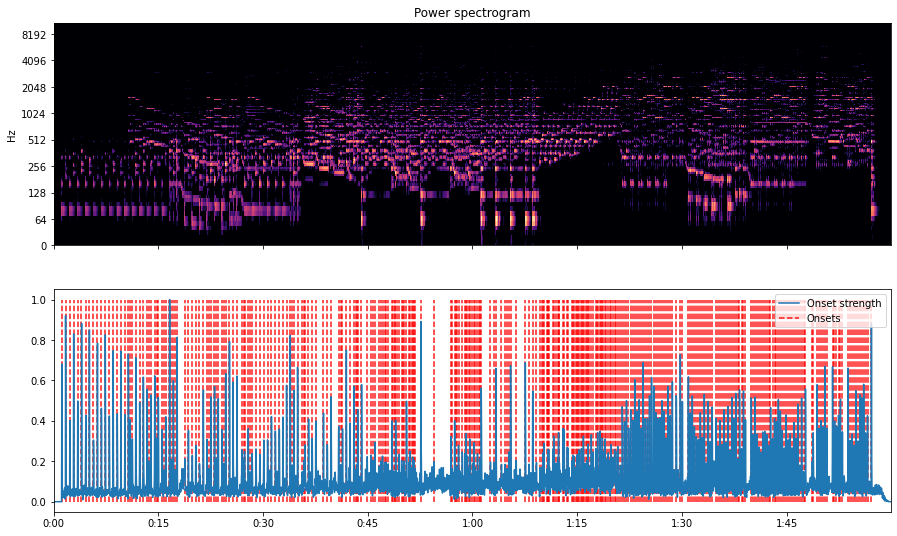

In [33]:
o_env = librosa.onset.onset_strength(x, sr=sampling_rate)
times = librosa.times_like(o_env, sr=sampling_rate)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sampling_rate)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,9))
librosa.display.specshow(S_dB, x_axis='time', 
                         y_axis='log', ax=ax[0])

ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), 
             color='r', alpha=0.9,
             linestyle='--', label='Onsets')
ax[1].legend()

plt.savefig('onsets.png')

/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


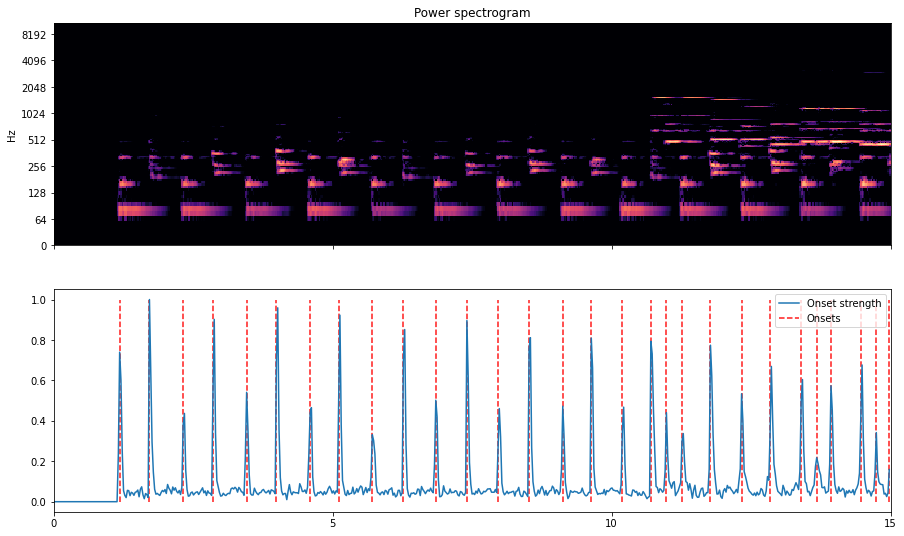

In [34]:
o_env = librosa.onset.onset_strength(x, sr=sampling_rate)
total_time = librosa.get_duration(x)
five_sec_mark = int(o_env.shape[0]/total_time*15)
o_env = o_env[:five_sec_mark]
times = librosa.times_like(o_env, sr=sampling_rate)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sampling_rate)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,9))
librosa.display.specshow(S_dB[:, :five_sec_mark], x_axis='time', 
                         y_axis='log', ax=ax[0])

ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), 
             color='r', alpha=0.9,
             linestyle='--', label='Onsets')
ax[1].legend()

plt.savefig('onsets-5secs.png')

In [35]:
onset_env = librosa.onset.onset_strength(x, sr=sampling_rate)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sampling_rate)
tempo

array([107.66601562])

In [36]:
import scipy.stats
prior = scipy.stats.uniform(30, 300)
utempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sampling_rate, prior=prior)
utempo

array([107.66601562])

In [37]:
dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sampling_rate,
                            aggregate=None)
dtempo

array([112.34714674, 112.34714674, 112.34714674, ..., 107.66601562,
       107.66601562, 107.66601562])

In [38]:
prior_lognorm = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
dtempo_lognorm = librosa.beat.tempo(onset_envelope=onset_env, sr=sampling_rate,
                                    aggregate=None,
                                    prior=prior_lognorm)
dtempo_lognorm


array([112.34714674, 112.34714674, 112.34714674, ...,  57.421875  ,
        57.421875  ,  57.421875  ])

<ipython-input-39-fe7ca5d8a6db>:8: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],


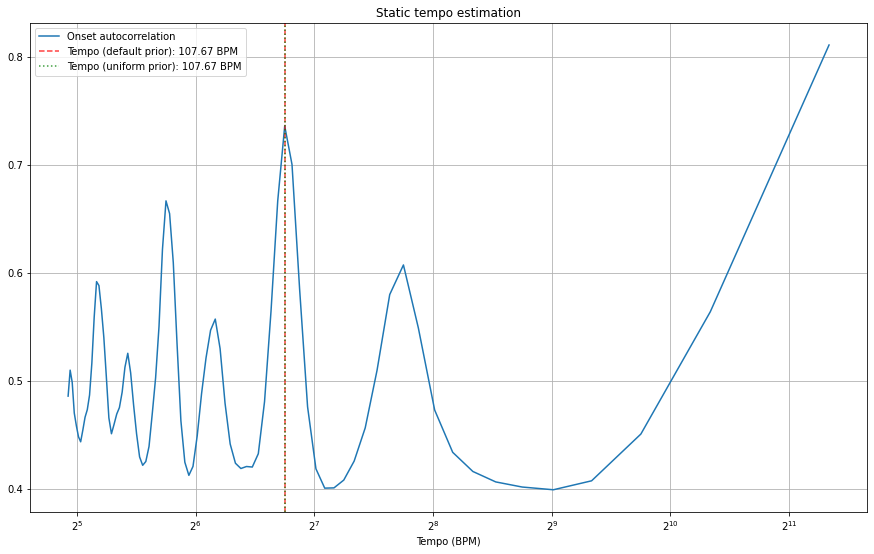

In [39]:
tempo = tempo.item()
utempo = utempo.item()
hop_length = 512
ac = librosa.autocorrelate(onset_env, 2 * sampling_rate // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sampling_rate,
                                  hop_length=hop_length)
fig, ax = plt.subplots(figsize=(15,9))
ax.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],
             label='Onset autocorrelation', basex=2)
ax.axvline(tempo, 0, 1, alpha=0.75, linestyle='--', color='r',
            label='Tempo (default prior): {:.2f} BPM'.format(tempo))
ax.axvline(utempo, 0, 1, alpha=0.75, linestyle=':', color='g',
            label='Tempo (uniform prior): {:.2f} BPM'.format(utempo))
ax.set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax.grid(True)
ax.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
tg = librosa.feature.tempogram(onset_envelope=onset_env, sr=sampling_rate,
                               hop_length=hop_length)
librosa.display.specshow(tg, x_axis='time', y_axis='tempo', cmap='magma', ax=ax)
ax.plot(librosa.times_like(dtempo), dtempo,
         color='c', linewidth=1.5, label='Tempo estimate (default prior)')
ax.set(title='Dynamic tempo estimation')
ax.legend()
plt.savefig('tempogram.png')

/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


In [ ]:
S = librosa.stft(x)
H, P = librosa.decompose.hpss(S)

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(15,9))
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(S), ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full power spectrogram')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max(np.abs(S))),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic power spectrogram')
ax[1].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max(np.abs(S))),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.savefig('hpss.png')

In [ ]:
y_harm = librosa.istft(H)
y_perc = librosa.istft(P)

In [ ]:
ipd.Audio(y_harm, rate=sampling_rate)

In [ ]:
ipd.Audio(y_perc, rate=sampling_rate)

In [ ]:
H, P = librosa.decompose.hpss(S, margin=3.0)
R = S - (H + P)
y_harm = librosa.istft(H)
y_perc = librosa.istft(P)
y_res = librosa.istft(R)

In [ ]:
ipd.Audio(y_harm, rate=sampling_rate)

In [ ]:
ipd.Audio(y_perc, rate=sampling_rate)

In [ ]:
ipd.Audio(y_res, rate=sampling_rate)